In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [27]:
class Own_LDA:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.n = x.shape[1]
        self.s_w = np.zeros((self.n, self.n))
        self.s_b = np.zeros((self.n, self.n))
        self.mean_vectors = []
        
    def calculate_mean_vectors(self):
        #Calculates mean vector
        for cl in np.unique(self.y):
            self.mean_vectors.append(np.mean(self.x[self.y==cl], axis=0))
            
    def get_mean_vectors(self):
        self.calculate_mean_vectors()
        return self.mean_vectors
    
    def calculate_s_w(self):
        for cl, mean_vector in zip(np.unique(self.y), self.mean_vectors):
            target_sc_mat = np.zeros((self.n,self.n)) #Scatter Matrix for all target
            #S_within is S1 + S2 + ... + Sn
            for row in self.x[self.y == cl]:
                row, mean_vector = row.reshape(self.n,1), mean_vector.reshape(self.n,1) #Reshaping to column vectors
                #S1 is Summation of (x - mean_vector_class_1)*(x - mean_vector_class_1).T
                target_sc_mat += np.dot((row-mean_vector), (row-mean_vector).T)
            self.s_w += target_sc_mat
            
    def get_s_within(self):
        self.calculate_s_w()
        return self.s_w
    
    def calculate_s_b(self):
        mu = np.mean(self.x, axis=0).reshape(self.n,1) #Making it column vector
        for cl, mean_vector in zip(np.unique(self.y), self.mean_vectors):  
            n_i = len(self.x[self.y==cl])
            mu_i = mean_vector.reshape(self.n,1) #Making it column vector
            #S_between is summation of # of samples in class_i * (mean_class_i - overall_mean_of_x) dot (mean_class_i - overall_mean_of_x).T 
            self.s_b += n_i * np.dot((mu_i - mu), (mu_i - mu).T)
            
    def get_s_between(self):
        self.calculate_s_b()
        return self.s_b
    
    def lda(self):
        #Step - 1 : Calculate mean vectors
        mean_vectors = self.get_mean_vectors()
        #Step - 2 : Calculate S_within
        s_within = self.get_s_within()
        #Step - 3 : Calculate S_between
        s_between = self.get_s_between()
        s_within_inverse = np.linalg.inv(s_within)
        w_intermediate = np.dot(s_within_inverse, s_between)
        #Step - 4: Find eigenvalues of S_within_inverse * s_between
        self.eigenvalues, self.eigenvectors = np.linalg.eig(w_intermediate)
        #Sort eigenvectors descending as per eigenvalues
        idx = self.eigenvalues.argsort()[::-1]   
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:,idx]
        self.eigenvectors = self.eigenvectors[:,:len(np.unique(self.y))-1] #keep only k-1 eigenvectors
        return self.get_W() #return eigenvectors, this is our W* (solution)
        
    def get_eigenvalues(self):
        #returns eigenvalues in descending order
        return self.eigenvalues
    
    def get_W(self):
        return self.eigenvectors #W are nothing but eigenvectors corresponding to top (k-1) eigenvalues
    
    def get_mu_tilde(self):
        #mu_tilde is 1/# of samples in class_i * summation of y_i
        #Here, y_i = W.transpose() * x_of_class_i [rows]
        W = self.get_W()
        mu_tilde = []
        y_projection = np.zeros_like(np.dot(W.transpose(), self.x[1,:]))
        for cl in np.unique(self.y):
            temp = np.zeros_like(y_projection)
            for row in self.x[self.y==cl]:
                #summation of y_i [W.transpose() * x_of_class_i] is done here
                temp += np.dot(W.transpose(), row)
            mu_tilde.append(temp/len(X[y==cl])) #1/# of samples in class_i
        return mu_tilde

In [28]:
raw_iris = datasets.load_iris()
X = raw_iris.data
y = raw_iris.target

In [29]:
own_lda = Own_LDA(X, y)

In [30]:
W = own_lda.lda()

[[ -3.02470965   1.04854437  -8.01870636  -3.4248604 ]
 [ -5.62090497   2.15249209 -15.10841483  -6.38266059]
 [  8.02895738  -2.86543716  21.36865869   9.09844555]
 [ 10.66719946  -3.41325116  27.99053514  12.05308354]]


In [31]:
mu_tilde = own_lda.get_mu_tilde()

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


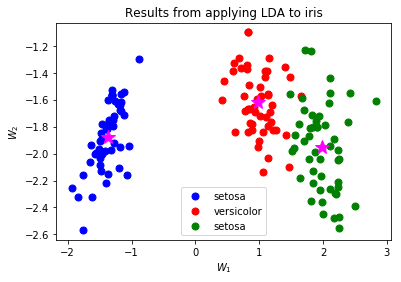

In [32]:
fig_width = 8
fig_height = 6

line_width = 2
marker_size = 7

axis_label_font_size = 9
legend_font_size = 9

# project iris data onto W
projection = np.matmul(W.transpose(), X.transpose())
projection = projection.transpose()

# plot the projections
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Results from applying LDA to iris')
ax.set_xlabel(r'$W_1$')
ax.set_ylabel(r'$W_2$')
ax.plot(projection[0:50, 0], projection[0:50, 1], linestyle='None', marker='o', markersize=marker_size, color='blue', label='setosa')
ax.plot(projection[50:100, 0], projection[50:100, 1], linestyle='None', marker='o', markersize=marker_size, color='red', label='versicolor')
ax.plot(projection[100:150, 0], projection[100:150, 1], linestyle='None', marker='o', markersize=marker_size, color='green', label='setosa')
ax.legend()

for i in range(len(mu_tilde)):
    ax.plot(mu_tilde[i][0], mu_tilde[i][1],
            linestyle='None', marker='*', markersize=15, color='magenta')

In [33]:
W

array([[-0.20490976+0.j, -0.00898234+0.j],
       [-0.38714331+0.j, -0.58899857+0.j],
       [ 0.54648218+0.j,  0.25428655+0.j],
       [ 0.71378517+0.j, -0.76703217+0.j]])